# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [33]:
import pandas as pd
import numpy as np

In [124]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [125]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [336]:
# Use to identify which values can be downcast
transactions = transactions.astype({
  "DAY": "Int16",
  "QUANTITY":"Int32",
  "STORE_ID":"Int32",
  "WEEK_NO":"Int8" 
})

In [127]:
# Reduced memory usage by ~35MB after converting to correct dtypes
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [337]:
# Check missing value counts
transactions.isna().sum()

household_key      0
BASKET_ID          0
DAY                0
PRODUCT_ID         0
QUANTITY           0
SALES_VALUE        0
STORE_ID           0
WEEK_NO            0
TOTAL_DISC         0
PRECENTAGE_DISC    0
dtype: int64

In [338]:
# Calculate unique product_ids in dataset with nunique
transactions["PRODUCT_ID"].nunique()

84138

In [340]:
#Calculate unique households in dataset with nunique (describe could also be used)

transactions["household_key"].nunique()

2099

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [142]:
# create a discount sum column and a percentage discount column
transactions["TOTAL_DISC"] = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"]
transactions["PRECENTAGE_DISC"] = abs(transactions["TOTAL_DISC"] / transactions["SALES_VALUE"])
# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["PRECENTAGE_DISC"] = (transactions["PRECENTAGE_DISC"].where(transactions["PRECENTAGE_DISC"]<1,1.0).where(transactions["PRECENTAGE_DISC"]>0,0.0))

In [198]:
transactions = transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'])


In [197]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,TOTAL_DISC,PRECENTAGE_DISC
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [341]:
# Total Sales Value
total_sales = transactions["SALES_VALUE"].sum()
total_sales

6666243.499999999

In [200]:
# Total Discount
total_discount = transactions["TOTAL_DISC"].sum()
total_discount

-1178658.0799999998

In [201]:
# Overall Percent Discount
overall_precentage = total_discount/total_sales
overall_precentage

-0.1768099350106248

In [343]:
# Average of pct_discount column

transactions["PRECENTAGE_DISC"].mean()

0.2073244407398103

In [202]:
# Total Quantity Sold
total_quantity = transactions["QUANTITY"].sum()
total_quantity

216713611

In [203]:
# Max quantity in single row
max(transactions["QUANTITY"])

89638

In [204]:
# Use to grab row with max value - discount rate is lower than average
transactions.loc[transactions["QUANTITY"] == max(transactions["QUANTITY"]),:]
#yes have a high precentage discount 

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,TOTAL_DISC,PRECENTAGE_DISC
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [205]:
# Sales value per transaction/basket
sales_by_basket = total_sales / transactions["BASKET_ID"].nunique()
sales_by_basket

28.61797938516092

In [206]:
# Sales value per household
sales_by_household = total_sales / transactions["household_key"].nunique()
sales_by_household

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: ylabel='Frequency'>

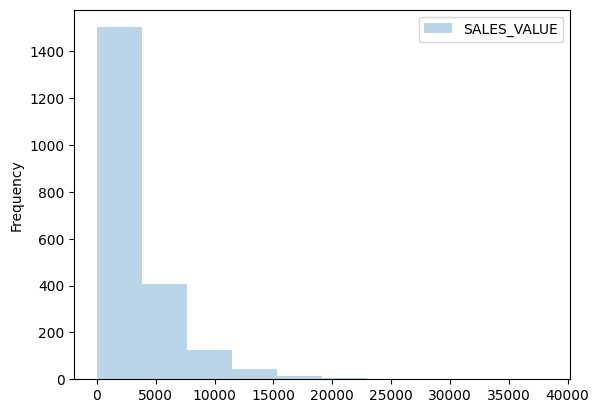

In [344]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogramt
transactions.groupby(transactions["household_key"]).agg({"SALES_VALUE":"sum"}).plot.hist(alpha = 0.3)

In [233]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows
top10_quantity = transactions.groupby(transactions["household_key"]).agg({"QUANTITY":"sum"}).sort_values(by="QUANTITY",ascending=False).iloc[:10,:]
top10_value = transactions.groupby(transactions["household_key"]).agg({"SALES_VALUE":"sum"}).sort_values(by="SALES_VALUE",ascending=False).iloc[:10,:]


,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [346]:
top10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [345]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


<Axes: xlabel='household_key'>

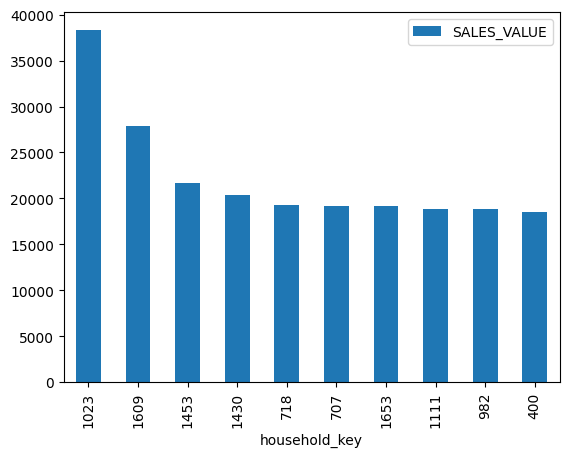

In [232]:
# top 10 households by sales value plotted with a bar plot
top10_value.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [242]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows
top10_product = transactions.groupby(transactions["PRODUCT_ID"]).agg({"SALES_VALUE":"sum"}).sort_values(by="SALES_VALUE",ascending=False).iloc[:10,:]

<Axes: ylabel='PRODUCT_ID'>

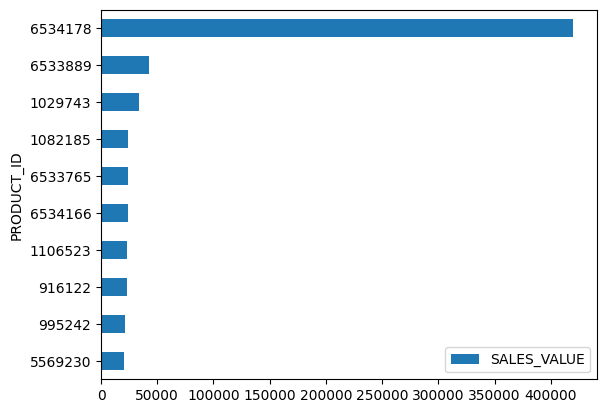

In [250]:
# plot top 10 products by sale value
top10_product.sort_values(by="SALES_VALUE").plot.barh()

In [251]:
top10_product

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [279]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products
(transactions.query(
    "PRODUCT_ID in @top10_product.index").loc[:,"TOTAL_DISC"].sum()
 )/(transactions.query(
     "PRODUCT_ID in @top10_product.index").loc[:,"SALES_VALUE"].sum())  


-0.10331267387397927

In [301]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
top10_product_hh =transactions.query("household_key in @top10_value.index").loc[:,"PRODUCT_ID"].value_counts().iloc[:10]
top10_product_hh

PRODUCT_ID
1082185    576
1029743    573
6534178    561
6533889    418
1127831    230
951590     202
860776     184
1106523    178
981760     174
9677202    168
Name: count, dtype: int64

In [295]:
# read in products data
products = pd.read_csv("../project_data/product.csv")

In [304]:
# Filter product table to products from prior cell
products.query("PRODUCT_ID in @top10_product_hh.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [347]:
# Product with highest quantity in a single row
product_id  = transactions.loc[transactions["QUANTITY"] == max(transactions["QUANTITY"]),"PRODUCT_ID"]
products["PRODUCT_ID"]
products.query("PRODUCT_ID in @product_id") 


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [348]:
# Look up 10 product names for all customers (from first cell)
products.query("PRODUCT_ID in @top10_product.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
